In [10]:
import pickle

from haloflow.npe import plotting
from haloflow.npe import valid as V

In [2]:
import torch
cuda = torch.cuda.is_available()
device = ("cuda:0" if cuda else "cpu")

In [3]:
sims = ['TNG50', 'TNG100', 'TNG_ALL', 'Eagle100', 'Simba100']
obs = 'mags'
version = 1
all_alpha = []
all_ecp = []
all_labels = []

In [ ]:
for sim in sims:
    ranks, alpha, ecp, y_nde = V.validate_npe(train_obs=obs, train_sim=sim, 
                                   test_obs=obs, test_sim=sim, 
                                   version=version, device=device)
    all_alpha.append(alpha)
    all_ecp.append(ecp)

In [5]:
# save alpha and ecp
with open(f'alpha_{obs}_{version}.pkl', 'wb') as f:
    pickle.dump(all_alpha, f)

with open(f'ecp_{obs}_{version}.pkl', 'wb') as f:
    pickle.dump(all_ecp, f)

In [7]:
with open('alpha_mags_1.pkl', 'rb') as f:
	alphas_mags = pickle.load(f)

with open('ecp_mags_1.pkl', 'rb') as f:
	ecps_mags = pickle.load(f)

with open('alpha_mags_morph_1.pkl', 'rb') as f:
	alphas_morph = pickle.load(f)

with open('ecp_mags_morph_1.pkl', 'rb') as f:
	ecps_morph = pickle.load(f)
    
with open('alpha_mags_morph_extra_1.pkl', 'rb') as f:
	alphas_morph_extra = pickle.load(f)

with open('ecp_mags_morph_extra_1.pkl', 'rb') as f:
	ecps_morph_extra = pickle.load(f)

In [8]:
labels = ['TNG 50', 'TNG 100', 'TNG ALL', 'Eagle 100', 'Simba 100']

Text(0.5, 1.0, '$X_{\\rm{mags}}, X_{\\rm{morph}}, X_{\\rm{extra}}$')

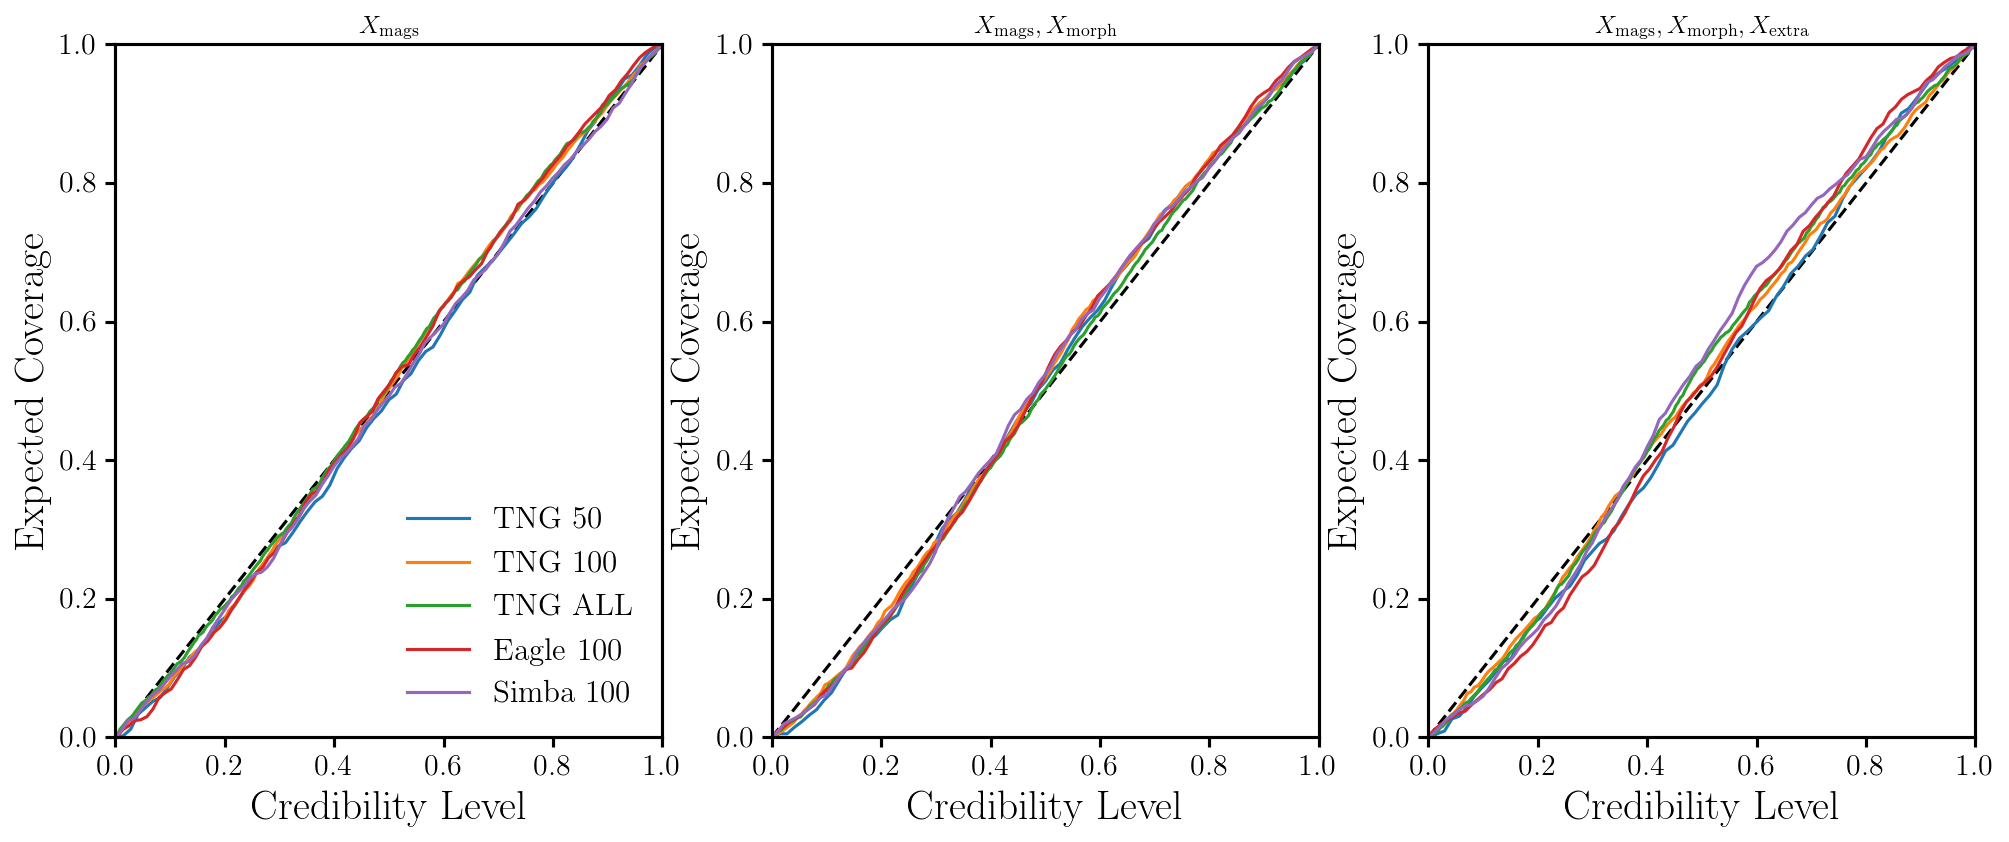

In [13]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), dpi=150)

# plot the coverage on the new axes
plotting.plot_coverage(alphas_mags, ecps_mags, labels, ax=ax1)
plotting.plot_coverage(alphas_morph, ecps_morph, [None]*len(labels), ax=ax2)
plotting.plot_coverage(alphas_morph_extra, ecps_morph_extra, [None]*len(labels), ax=ax3)

ax1.set_title(r'$X_{\rm{mags}}$')
ax2.set_title(r'$X_{\rm{mags}}, X_{\rm{morph}}$')
ax3.set_title(r'$X_{\rm{mags}}, X_{\rm{morph}}, X_{\rm{extra}}$')